# Load libraries

In [283]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import re


# Specify git executable file for GitPython in Jupyter Notebook (In IDE, it can still work without this line.)
os.environ["GIT_PYTHON_GIT_EXECUTABLE"] = "C:\Program Files\Git\cmd\git.exe"

import git
from git import RemoteProgress

from git import Repo
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Clone repo from GitHub

Link: https://git-scm.com/docs/git-clone <br>
<b>Note:</b> In case too-long file path issue occurs in Windows, set <code>git config --system core.longpaths true</code>

In [284]:
class Progress(RemoteProgress):
    def update(self, op_code, cur_count, max_count=None, message=''):
        print(self._cur_line)

In [285]:
#remote_link = "https://github.com/phpmyadmin/phpmyadmin"
local_link = "fusionauth-jwt"
# Uncomment to clone
# Repo.clone_from(remote_link, local_link, progress=Progress())

In [286]:
repo = Repo(local_link)
fixing_commit = "abb0d479389a2509f939452a6767dc424bb5e6ba"
affected_file = "src/test/java/org/primeframework/jwt/VulnerabilityTest.java"

# A) Show info of a commit
Link: https://git-scm.com/docs/git-show
You can explore different parameters.

In [287]:
show_data = repo.git.show("-s", fixing_commit).splitlines()
for line in show_data:
    print(line)

commit abb0d479389a2509f939452a6767dc424bb5e6ba
Author: Daniel DeGroff <daniel@inversoft.com>
Date:   Wed May 2 09:31:18 2018 -0600

    Fixing issue #3 and adding tests to confirm.


# B) Show total files affected in the fixing commit

In [288]:
show_total_files_affected = repo.git.show ("--stat", fixing_commit).splitlines()
for line in show_total_files_affected:
    print(line)

commit abb0d479389a2509f939452a6767dc424bb5e6ba
Author: Daniel DeGroff <daniel@inversoft.com>
Date:   Wed May 2 09:31:18 2018 -0600

    Fixing issue #3 and adding tests to confirm.

 .../java/org/primeframework/jwt/JWTDecoder.java    | 12 ++++++---
 .../org/primeframework/jwt/VulnerabilityTest.java  | 29 +++++++++++++++++++---
 2 files changed, 34 insertions(+), 7 deletions(-)


# C) Show total directories affected in the fixing commit

In [289]:
show_total_directories_affected = repo.git.show ("--dirstat", fixing_commit).splitlines()
for line in show_total_directories_affected:
    print(line)

commit abb0d479389a2509f939452a6767dc424bb5e6ba
Author: Daniel DeGroff <daniel@inversoft.com>
Date:   Wed May 2 09:31:18 2018 -0600

    Fixing issue #3 and adding tests to confirm.

  19.7% src/main/java/org/primeframework/jwt/
  80.2% src/test/java/org/primeframework/jwt/


# D) Show total lines of code deleted including comments and blank lines

In [290]:
show_total_lines_deleted = repo.git.show ("--shortstat", fixing_commit).splitlines()
show_total_lines_deleted.reverse()
show_total_lines_deleted = show_total_lines_deleted[0].split(',') 
print(show_total_lines_deleted[2])

 7 deletions(-)


# E) Show total lines of code added including comments and blank lines

In [291]:
show_total_lines_added = repo.git.show ("--shortstat", fixing_commit).splitlines()
show_total_lines_added.reverse()
show_total_lines_added = show_total_lines_added[0].split(',') 
print(show_total_lines_added[1])

 34 insertions(+)


# F) Show total lines of code deleted excluding comments and blank lines

In [292]:
show_total_lines_deleted = repo.git.show("-U0","--pretty=""",fixing_commit).splitlines()
temp_line_deleted = []
t_l_deleted = 0
for line in show_total_lines_deleted:
    if re.search("^\-",line):
        l = line.split(" ")
        if(len(l) > 1):
            if(len(l[0])==1):
                if(l[1][:1] != '*' or l[1][:1] !='/'):
                    print(line)
                    t_l_add += 1
print("Total lines of code deleted excluding comments and blank lines = "+ str(t_l_deleted))
            

-    int index = encodedJWT.lastIndexOf(".");
-    // The message comprises the first two segments of the entire JWT, the signature is the last segment.
-    byte[] message = encodedJWT.substring(0, index).getBytes(StandardCharsets.UTF_8);
-    expectException(InvalidJWTException.class, ()
-        -> JWT.getDecoder().decode(hackedJWT, HMACVerifier.newVerifier("secret")));
-    expectException(MissingVerifierException.class, ()
-        -> JWT.getDecoder().decode(encodedJWT));
Total lines of code deleted excluding comments and blank lines = 0


# G) Show total lines of code added excluding comments and blank lines

In [293]:
show_total_lines_add = repo.git.show("-U0","--pretty=""",fixing_commit).splitlines()
temp_line_add = []
t_l_add = 0
for line in show_total_lines_add:
    if re.search("^\+",line):
        l = line.split(" ")
        if(len(l) > 1):
            if(len(l[0])==1):
                if(l[1][:1] != '*' or l[1][:1] !='/'):
                    print(line)
                    t_l_add += 1
print("Total lines of code added excluding comments and blank lines = "+ str(t_l_add))
            

+    // The callers of this decode will have already handled 'none' if it was deemed to be valid based upon
+    // the provided verifiers. At this point, if we have a 'none' algorithm specified in the header, it is invalid.
+    if (header.algorithm == Algorithm.none) {
+      throw new MissingVerifierException("No Verifier has been provided for verify a signature signed using [" + header.algorithm.getName() + "]");
+    }
+    int index = encodedJWT.lastIndexOf(".");
+    // The message comprises the first two segments of the entire JWT, the signature is the last segment.
+    byte[] message = encodedJWT.substring(0, index).getBytes(StandardCharsets.UTF_8);
+    expectException(InvalidJWTException.class, () -> JWT.getDecoder().decode(hackedJWT, HMACVerifier.newVerifier("secret")));
+    expectException(MissingVerifierException.class, () -> JWT.getDecoder().decode(encodedJWT));
+  }
+  @Test
+  public void test_unsecuredJWT_validation() throws Exception {
+    JWT jwt = new JWT().setS

# H) Days between current fixing commit and previous commit of each affected file

In [294]:
date_diff = repo.git.log ("--format=%cd",fixing_commit,"--",affected_file,"-2").splitlines()
currentdate = datetime.strptime(date_diff[0],"%a %b %d %X %Y %z")
previousdate= datetime.strptime(date_diff[1],"%a %b %d %X %Y %z")
datediff = (abs(currentdate-previousdate).days)
print("Days between current fixing commit and previous commit of each affected file:"+str(datediff))

Days between current fixing commit and previous commit of each affected file:60


# I)  no.of.times each affected file of the current fixing commit been modified in the past time since their creation

In [295]:
no_of_times = repo.git.log ("--format=%cd", fixing_commit,"--",affected_file,"--follow").splitlines()
print(len(no_of_times))

3


# J) Developers have modified each affected file since its creation

In [296]:
no_of_developers = repo.git.log ("--follow","--format=%an",fixing_commit,"--",affected_file).splitlines()
developers= set(no_of_developers)
num=1
for line in developers:
        print(num,line)
        num=num+1
        

1 Daniel DeGroff


# K) For each developer identified, no.of.commits have each of them submitted

In [297]:
commit_developers = repo.git.shortlog("-s","-n","--no-merges",fixing_commit,"--",affected_file).splitlines()
developer_commits = []
for line in commit_developers:
    commit, developer = line.split("\t")
    developer_commits.append([int(commit),developer])

In [298]:
df = pd.DataFrame(developer_commits, columns=['commit','Developer'])

In [299]:
df.head()

,commit,Developer
0,3,Daniel DeGroff


# Show all developers across all branches
Link: https://git-scm.com/docs/git-shortlog

In [300]:
commit_authors = repo.git.shortlog("-sne", "--all").splitlines()

author_commits = []

for commit_author in commit_authors:
    commit, author = commit_author.split("\t")
    author_commits.append([int(commit), author])

In [301]:
df = pd.DataFrame(author_commits, columns=['Commit', 'Author'])

In [302]:
df.head()

,Commit,Author
0,138,Daniel DeGroff <daniel@inversoft.com>
1,7,Daniel DeGroff <robotdan@users.noreply.github....
2,6,Daniel DeGroff <daniel@fusionauth.io>
3,3,Brian Pontarelli <brian@inversoft.com>
4,1,Luan Kevin Ferreira <luankevinferreira@gmail.com>


## Top 10 most active developers in the project

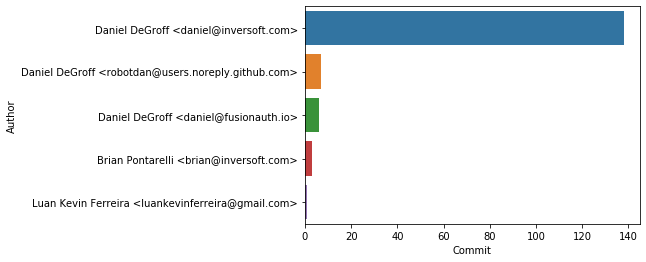

In [303]:
sns.barplot(y='Author', x="Commit", data=df[:10])

# Code changes between 2 commits
<b>Note:</b> Watch out for the initial commit (no parent commit)

In [304]:
diff_data = repo.git.diff(fixing_commit + "^", fixing_commit).splitlines()
for line in diff_data:
    print(line)

diff --git a/src/main/java/org/primeframework/jwt/JWTDecoder.java b/src/main/java/org/primeframework/jwt/JWTDecoder.java
index 6736d6b..38214b5 100644
--- a/src/main/java/org/primeframework/jwt/JWTDecoder.java
+++ b/src/main/java/org/primeframework/jwt/JWTDecoder.java
@@ -151,9 +151,11 @@ public class JWTDecoder {
   }
 
   private JWT decode(String encodedJWT, Header header, String[] parts, Verifier verifier) {
-    int index = encodedJWT.lastIndexOf(".");
-    // The message comprises the first two segments of the entire JWT, the signature is the last segment.
-    byte[] message = encodedJWT.substring(0, index).getBytes(StandardCharsets.UTF_8);
+    // The callers of this decode will have already handled 'none' if it was deemed to be valid based upon
+    // the provided verifiers. At this point, if we have a 'none' algorithm specified in the header, it is invalid.
+    if (header.algorithm == Algorithm.none) {
+      throw new MissingVerifierException("No Verifier has been provided

# Identify the last commit that changes a line modified in the current commit

Link: https://git-scm.com/docs/git-blame

In [305]:
blame_data = repo.git.blame("-L113,+1", fixing_commit + "^", "--", affected_file).splitlines()
for line in blame_data:
    print(line)

4fb9484a (Daniel DeGroff 2018-03-01 11:29:03 -0700 113)     expectException(InvalidJWTSignatureException.class, () -> JWTDecoder.getInstance().decode(hmacSignedJWTTakeTwo, rsaVerifier, hmacVerifier));


# Show all the commit history between two commits

Link: https://git-scm.com/docs/git-log <br> Watch out for initial commit (no parent commit)

In [306]:
last_commit = blame_data[0].strip().split()[0]
log_data = repo.git.log("--oneline", last_commit + ".." + fixing_commit + "^").splitlines()
print("Number of commits in between:", len(log_data))

Number of commits in between: 5


In [307]:
log_data

['8d73248 README add link to CVE-2018-1000125',
 '8beab4f README',
 '4e96a3b README',
 '66b1194 README',
 '6061417 Test cleanup']